# Módulo 4 Sprint

**Objetivo del proyecto**
*(Competencias del módulo)*


Elaborar inferencias estadísticas a una muestra para la estimación de una población de acuerdo a los requerimientos de análisis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

house = pd.read_csv('house.csv')
df_house = pd.DataFrame(house)

df_house = df_house.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'])

df_house



,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


***Con la previsualización del df podemos notar que existen pocas columnas con datos numéricos que podemos trabajar de manera estadística motivo por el cual haremos una mayor limpieza de las variables eligiendo solo 8 de ellas, las cuales para este análisis debieran resultar más útiles***

In [3]:
elegidas = ['LotArea', 'OverallCond', 'YearBuilt', 'Foundation', '1stFlrSF', 'SaleCondition', 'SalePrice', 'YrSold']

columnas_a_eliminar = [col for col in df_house.columns if col not in elegidas]
df_elegido = df_house.drop(columns=columnas_a_eliminar)

df_elegido


,LotArea,OverallCond,YearBuilt,Foundation,1stFlrSF,YrSold,SaleCondition,SalePrice
0,8450,5,2003,PConc,856,2008,Normal,208500
1,9600,8,1976,CBlock,1262,2007,Normal,181500
2,11250,5,2001,PConc,920,2008,Normal,223500
3,9550,5,1915,BrkTil,961,2006,Abnorml,140000
4,14260,5,2000,PConc,1145,2008,Normal,250000
...,...,...,...,...,...,...,...,...
1455,7917,5,1999,PConc,953,2007,Normal,175000
1456,13175,6,1978,CBlock,2073,2010,Normal,210000
1457,9042,9,1941,Stone,1188,2010,Normal,266500
1458,9717,6,1950,CBlock,1078,2010,Normal,142125


***Se generan gráficos de manera de poder visualizar las distribución buscando la existencia de outliers que podrían afectar los resultados.***

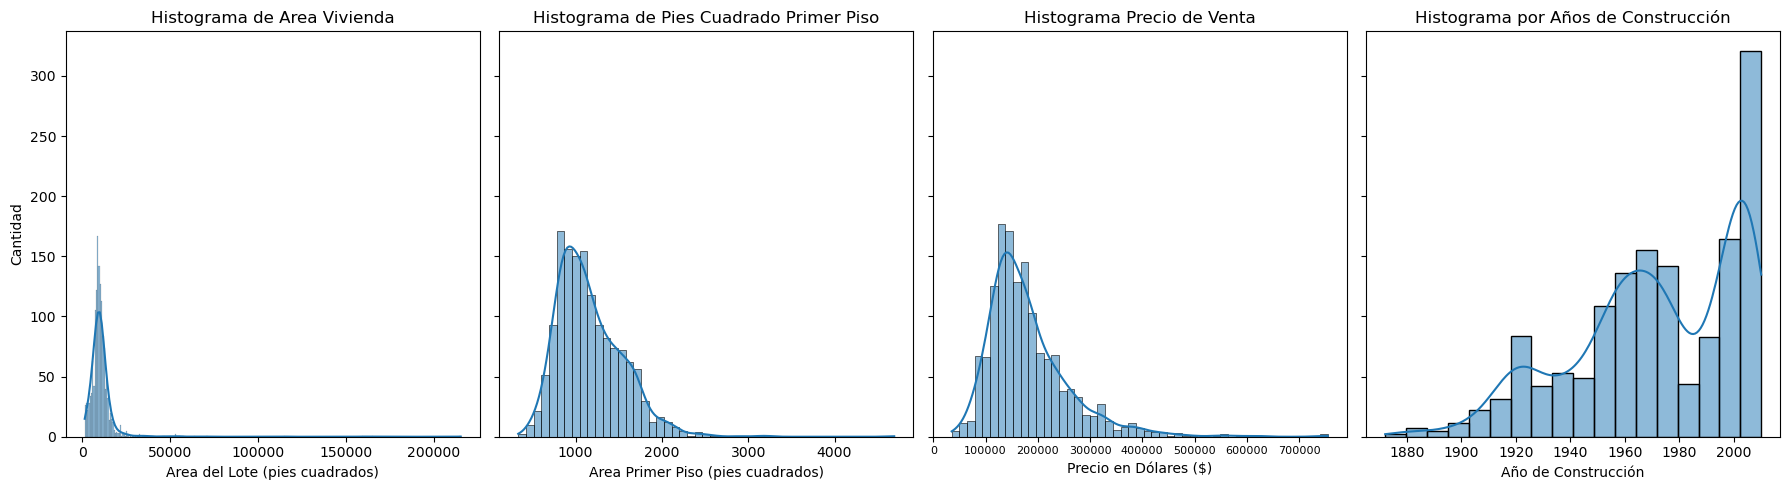

In [4]:
# Crear subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)


sns.histplot(ax=axes[0], data=df_elegido, x='LotArea', kde=True)
axes[0].set_title('Histograma de Area Vivienda')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Area del Lote (pies cuadrados)')
# Histograma para Feature2
sns.histplot(ax=axes[1], data=df_elegido, x='1stFlrSF', kde=True)
axes[1].set_title('Histograma de Pies Cuadrado Primer Piso')
axes[1].set_xlabel('Area Primer Piso (pies cuadrados)')

sns.histplot(ax=axes[2], data=df_elegido, x='SalePrice', kde=True)
axes[2].set_title('Histograma Precio de Venta')
axes[2].set_xlabel('Precio en Dólares ($)')
axes[2].tick_params(axis='x', labelsize=8)

sns.histplot(ax=axes[3], data=df_elegido, x='YearBuilt', kde=True)
axes[3].set_title('Histograma por Años de Construcción')
axes[3].set_xlabel('Año de Construcción')



plt.tight_layout()
plt.show()




***Se puede observar que en las variables Area Vivienda, Área Primer Piso y Precio existe una distribución similar a la distribución normal corrida hacia la izquierda lo que sugiere que existen outliers o valores atipicos hacia los valores altos.***

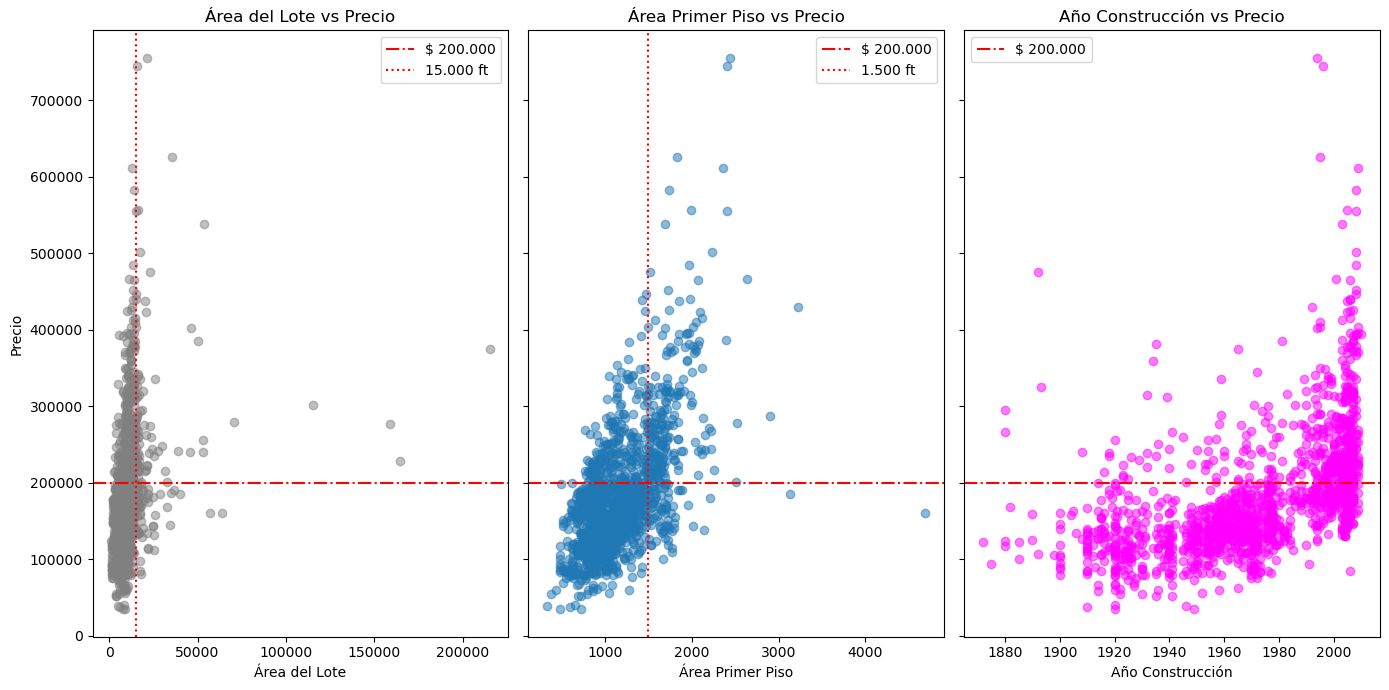

In [5]:
fig, ax = plt.subplots(1, 3, figsize= (14,7), sharey=True)

z = df_elegido['1stFlrSF']
y = df_elegido['SalePrice']
x = df_elegido['LotArea']
w = df_elegido['YearBuilt']
precio_limite = 200000
area_lote_limite = 15000
area_primer_piso_limite = 1500

# --------------------------------------------------------------------------------------------

ax[0].scatter(x, y, color='gray', alpha=0.5)
ax[0].set_title('Área del Lote vs Precio')
ax[0].set_xlabel('Área del Lote')
ax[0].set_ylabel('Precio')
ax[0].axhline(precio_limite, color='red', linestyle='-.', label='$ 200.000')
ax[0].axvline(area_lote_limite, color='red', linestyle=':', label='15.000 ft')
ax[0].legend()

# ----------------------------------------------------------------------------------------------

ax[1].scatter(z, y, alpha=0.5)
ax[1].set_title('Área Primer Piso vs Precio')
ax[1].set_xlabel('Área Primer Piso')
ax[1].axhline(precio_limite, color='red', linestyle='-.', label='$ 200.000')
ax[1].axvline(area_primer_piso_limite, color='red', linestyle=':', label='1.500 ft')
ax[1].legend()

# ----------------------------------------------------------------------------------------------

ax[2].scatter(w, y, color='fuchsia',alpha=0.5)
ax[2].set_title('Año Construcción vs Precio')
ax[2].set_xlabel('Año Construcción')
ax[2].axhline(precio_limite, color='red', linestyle='-.', label='$ 200.000')
ax[2].legend()

plt.tight_layout()
plt.show()

***Los gráficos de dispersión, por otra parte, reflejan una alta concentración de casas en rangos acotados y se puede apreciar también la existencia de outliers.  Para el objetivo del ejercicio no serán considerados, de tal manera de poder configurar gráficos con distribución normal y que se ajusta de mejor manera al cliente objetivo.***

In [6]:
df_elegido_elegido = df_elegido[(df_elegido['SalePrice'] < 200000) & (df_elegido['LotArea'] < 15000) & (df_elegido['1stFlrSF'] < 1500)]
df_elegido_elegido.describe()


,LotArea,OverallCond,YearBuilt,1stFlrSF,YrSold,SalePrice
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,8255.803728,5.708333,1961.944079,981.619518,2007.817982,138916.501096
std,2823.886053,1.185541,28.907403,225.504749,1.322683,32938.998207
min,1300.000000,1.000000,1872.000000,334.000000,2006.000000,34900.000000
25%,6838.500000,5.000000,1941.000000,816.000000,2007.000000,118000.000000
50%,8520.500000,5.000000,1964.000000,963.000000,2008.000000,139450.000000
75%,10140.000000,7.000000,1980.000000,1140.250000,2009.000000,164750.000000
max,14850.000000,9.000000,2009.000000,1489.000000,2010.000000,199900.000000


In [7]:
moda_area_lote = df_elegido_elegido['LotArea'].mode()[0]
moda_area_1_piso = df_elegido_elegido['1stFlrSF'].mode()[0]
moda_precio_venta = df_elegido_elegido['SalePrice'].mode()[0]

media_area_lote = round(df_elegido_elegido['LotArea'].mean(),2)
media_area_1_piso = round(df_elegido_elegido['1stFlrSF'].mean(), 2)
media_precio_venta = round(df_elegido_elegido['SalePrice'].mean(), 2)

mediana_area_lote = df_elegido_elegido['LotArea'].median()
mediana_area_1_piso = df_elegido_elegido['1stFlrSF'].median()
mediana_precio_venta = df_elegido_elegido['SalePrice'].median()

des_std_area_lote = df_elegido['LotArea'].std()
des_std_area_1_piso = df_elegido['1stFlrSF'].std()
des_std_precio_venta = df_elegido['SalePrice'].std()



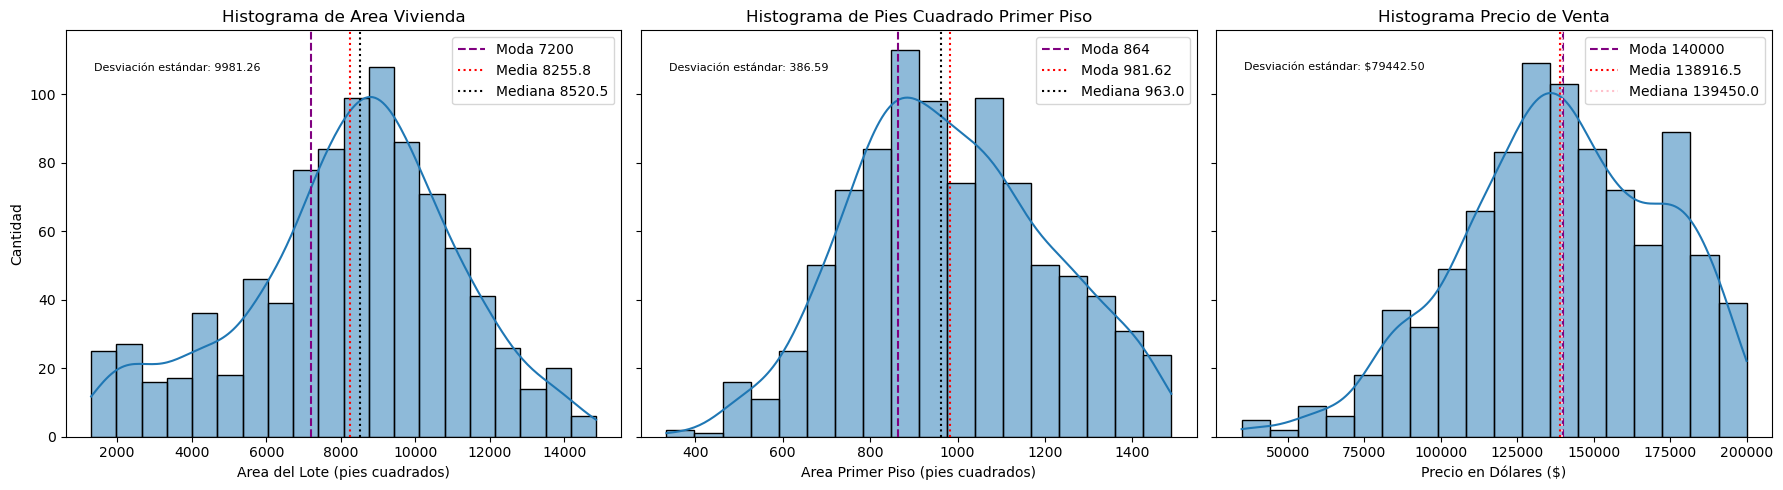

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)


sns.histplot(ax=axes[0], data=df_elegido_elegido, x='LotArea', kde=True)
axes[0].set_title('Histograma de Area Vivienda')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Area del Lote (pies cuadrados)')
axes[0].axvline(moda_area_lote,  color="purple", linestyle="--", label=f'Moda {moda_area_lote}')
axes[0].axvline(media_area_lote,  color="red", linestyle=":", label=f'Media {media_area_lote}')
axes[0].axvline(mediana_area_lote,  color="black", linestyle=":", label=f'Mediana {mediana_area_lote}')
axes[0].legend()
axes[0].text(0.05, 0.9, f'Desviación estándar: {des_std_area_lote:.2f}', transform=axes[0].transAxes, fontsize=8)
# Histograma para Feature2
sns.histplot(ax=axes[1], data=df_elegido_elegido, x='1stFlrSF', kde=True)
axes[1].set_title('Histograma de Pies Cuadrado Primer Piso')
axes[1].set_xlabel('Area Primer Piso (pies cuadrados)')
axes[1].axvline(moda_area_1_piso,  color="purple", linestyle="--", label=f'Moda {moda_area_1_piso}')
axes[1].axvline(media_area_1_piso,  color="red", linestyle=":", label=f'Moda {media_area_1_piso}')
axes[1].axvline(mediana_area_1_piso,  color="black", linestyle=":", label=f'Mediana {mediana_area_1_piso}')
axes[1].legend()
axes[1].text(0.05, 0.9, f'Desviación estándar: {des_std_area_1_piso:.2f}', transform=axes[1].transAxes, fontsize=8)

sns.histplot(ax=axes[2], data=df_elegido_elegido, x='SalePrice', kde=True)
axes[2].set_title('Histograma Precio de Venta')
axes[2].set_xlabel('Precio en Dólares ($)')
axes[2].axvline(moda_precio_venta,  color="purple", linestyle="--", label=f'Moda {moda_precio_venta}')
axes[2].axvline(media_precio_venta,  color="red", linestyle=":", label=f'Media {media_precio_venta}')
axes[2].axvline(mediana_precio_venta,  color="pink", linestyle=":", label=f'Mediana {mediana_precio_venta}')
axes[2].legend()
axes[2].text(0.05, 0.9, f'Desviación estándar: ${des_std_precio_venta:.2f}', transform=axes[2].transAxes, fontsize=8)

plt.tight_layout()
plt.show()


***Luego de realizada la limpieza de datos eliminando outliers se puede ver en los gráficos que los datos tienden a demostrar una tendencia hacia la distribución normal.***

***Crearemos una nueva variable 'Precio por Pies Cuadrados' que nos permita tener otra alternativa para el análisis.  Someteremos la nueva variable al mismo análisis.***

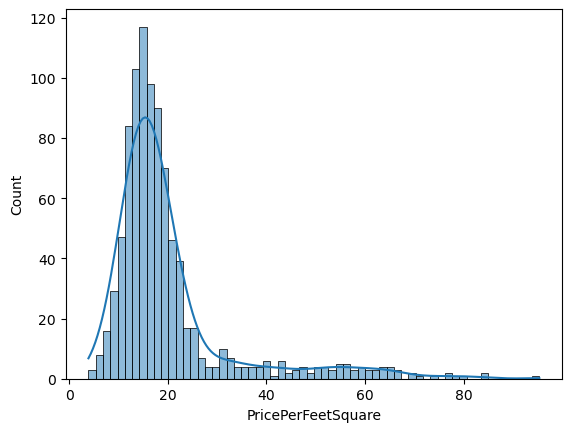

In [9]:
df_elegido_elegido['PricePerFeetSquare'] = df_elegido_elegido['SalePrice'] / df_elegido_elegido['LotArea']

sns.histplot(data=df_elegido_elegido, x='PricePerFeetSquare', kde=True)

plt.show()

***El gráfico nos muestra una concentración de la muestra según la variable Precio por Pies Cuadrados hasta el valor de 28 aproximadamente, motivo por el cual usaremos ese valor como límite superior, eliminando los valores que sean superiores a él***

In [10]:
df_super_elegido = df_elegido_elegido[df_elegido_elegido['PricePerFeetSquare'] < 28]

moda_area_lote = df_super_elegido['LotArea'].mode()[0]            # 7200
moda_area_1_piso = df_super_elegido['1stFlrSF'].mode()[0]         # 864
moda_precio_venta = df_super_elegido['SalePrice'].mode()[0]       # 140000
moda_ppfs = df_super_elegido['PricePerFeetSquare'].mode()[0]      # 12.5

media_area_lote = round(df_super_elegido['LotArea'].mean(),2)               # 9770.64
media_area_1_piso = round(df_super_elegido['1stFlrSF'].mean(), 2)           # 197.83
media_precio_venta = round(df_super_elegido['SalePrice'].mean(), 2)         # 159588.31
media_ppfs = round(df_super_elegido['PricePerFeetSquare'].mean(), 2)        # 16.77

mediana_area_lote = df_super_elegido['LotArea'].median()                    # 9525.0
mediana_area_1_piso = df_super_elegido['1stFlrSF'].median()                 # 1044.0
mediana_precio_venta = df_super_elegido['SalePrice'].median()               # 152000.0
mediana_ppfs = round(df_super_elegido['PricePerFeetSquare'].median(), 2)    # 16.5



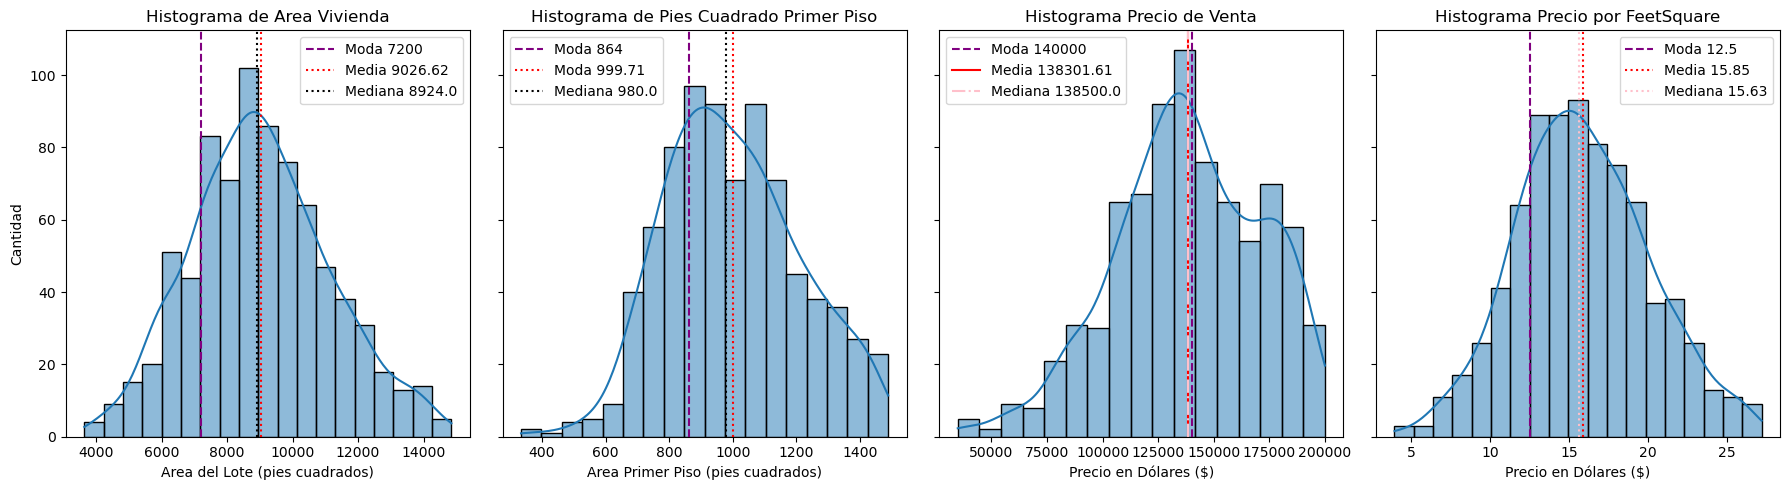

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)


sns.histplot(ax=axes[0], data=df_super_elegido, x='LotArea', kde=True)
axes[0].set_title('Histograma de Area Vivienda')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Area del Lote (pies cuadrados)')
axes[0].axvline(moda_area_lote,  color="purple", linestyle="--", label=f'Moda {moda_area_lote}')
axes[0].axvline(media_area_lote,  color="red", linestyle=":", label=f'Media {media_area_lote}')
axes[0].axvline(mediana_area_lote,  color="black", linestyle=":", label=f'Mediana {mediana_area_lote}')
axes[0].legend()
# Histograma para Feature2
sns.histplot(ax=axes[1], data=df_super_elegido, x='1stFlrSF', kde=True)
axes[1].set_title('Histograma de Pies Cuadrado Primer Piso')
axes[1].set_xlabel('Area Primer Piso (pies cuadrados)')
axes[1].axvline(moda_area_1_piso,  color="purple", linestyle="--", label=f'Moda {moda_area_1_piso}')
axes[1].axvline(media_area_1_piso,  color="red", linestyle=":", label=f'Moda {media_area_1_piso}')
axes[1].axvline(mediana_area_1_piso,  color="black", linestyle=":", label=f'Mediana {mediana_area_1_piso}')
axes[1].legend()

sns.histplot(ax=axes[2], data=df_super_elegido, x='SalePrice', kde=True)
axes[2].set_title('Histograma Precio de Venta')
axes[2].set_xlabel('Precio en Dólares ($)')
axes[2].axvline(moda_precio_venta,  color="purple", linestyle="--", label=f'Moda {moda_precio_venta}')
axes[2].axvline(media_precio_venta,  color="red", linestyle="-", label=f'Media {media_precio_venta}')
axes[2].axvline(mediana_precio_venta,  color="pink", linestyle="-.", label=f'Mediana {mediana_precio_venta}')
axes[2].legend()

sns.histplot(ax=axes[3], data=df_super_elegido, x='PricePerFeetSquare', kde=True)
axes[3].set_title('Histograma Precio por FeetSquare')
axes[3].set_xlabel('Precio en Dólares ($)')
axes[3].axvline(moda_ppfs,  color="purple", linestyle="--", label=f'Moda {moda_ppfs}')
axes[3].axvline(media_ppfs,  color="red", linestyle=":", label=f'Media {media_ppfs}')
axes[3].axvline(mediana_ppfs,  color="pink", linestyle=":", label=f'Mediana {mediana_ppfs}')
axes[3].legend()

plt.tight_layout()
plt.show()


***Con las nuevas dimensiones de la muestra, obtenemos resultados más cercanos a una distribución normal.  Usaremos estos datos para los cálculos requeridos, asumiendo a que son representativos de la población total.***

## Calcular Intervalos de Confianza y graficarlos

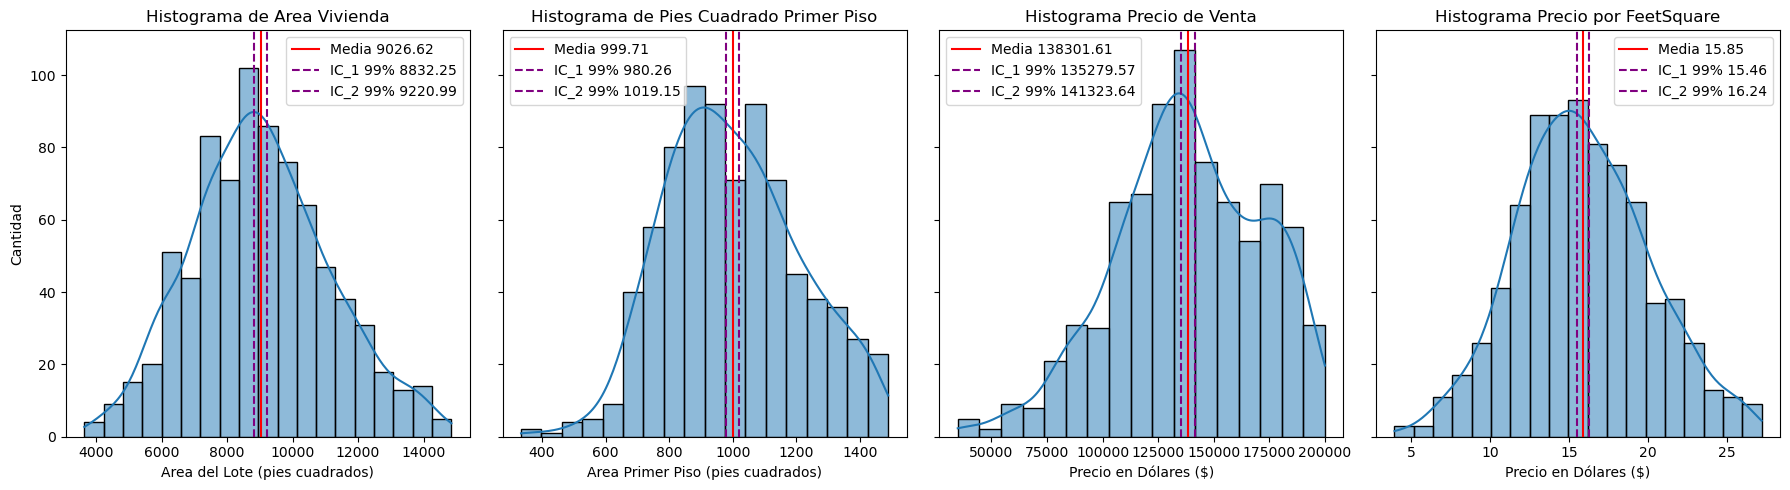

In [12]:
import numpy as np
import pandas as pd
import statsmodels.stats.api as sms

ic_area_lote = sms.DescrStatsW(df_super_elegido['LotArea']).tconfint_mean(alpha=0.01)
ic_area_1_piso = sms.DescrStatsW(df_super_elegido['1stFlrSF']).tconfint_mean(alpha=0.01)
ic_precio_venta = sms.DescrStatsW(df_super_elegido['SalePrice']).tconfint_mean(alpha=0.01)
ic_ppfs = sms.DescrStatsW(df_super_elegido['PricePerFeetSquare']).tconfint_mean(alpha=0.01)

fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)


sns.histplot(ax=axes[0], data=df_super_elegido, x='LotArea', kde=True)
axes[0].set_title('Histograma de Area Vivienda')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Area del Lote (pies cuadrados)')
axes[0].axvline(media_area_lote,  color="red", linestyle="-", label=f'Media {media_area_lote}')
axes[0].axvline(ic_area_lote[0],  color="purple", linestyle="--", label=f'IC_1 99% {ic_area_lote[0]:.2f}')
axes[0].axvline(ic_area_lote[1],  color="purple", linestyle="--", label=f'IC_2 99% {ic_area_lote[1]:.2f}')
axes[0].legend()
# Histograma para Feature2
sns.histplot(ax=axes[1], data=df_super_elegido, x='1stFlrSF', kde=True)
axes[1].set_title('Histograma de Pies Cuadrado Primer Piso')
axes[1].set_xlabel('Area Primer Piso (pies cuadrados)')
axes[1].axvline(media_area_1_piso,  color="red", linestyle="-", label=f'Media {media_area_1_piso}')
axes[1].axvline(ic_area_1_piso[0],  color="purple", linestyle="--", label=f'IC_1 99% {ic_area_1_piso[0]:.2f}')
axes[1].axvline(ic_area_1_piso[1],  color="purple", linestyle="--", label=f'IC_2 99% {ic_area_1_piso[1]:.2f}')
axes[1].legend()

sns.histplot(ax=axes[2], data=df_super_elegido, x='SalePrice', kde=True)
axes[2].set_title('Histograma Precio de Venta')
axes[2].set_xlabel('Precio en Dólares ($)')
axes[2].axvline(media_precio_venta,  color="red", linestyle="-", label=f'Media {media_precio_venta}')
axes[2].axvline(ic_precio_venta[0],  color="purple", linestyle="--", label=f'IC_1 99% {ic_precio_venta[0]:.2f}')
axes[2].axvline(ic_precio_venta[1],  color="purple", linestyle="--", label=f'IC_2 99% {ic_precio_venta[1]:.2f}')
axes[2].legend()

sns.histplot(ax=axes[3], data=df_super_elegido, x='PricePerFeetSquare', kde=True)
axes[3].set_title('Histograma Precio por FeetSquare')
axes[3].set_xlabel('Precio en Dólares ($)')
axes[3].axvline(media_ppfs,  color="red", linestyle="-", label=f'Media {media_ppfs}')
axes[3].axvline(ic_ppfs[0],  color="purple", linestyle="--", label=f'IC_1 99% {ic_ppfs[0]:.2f}')
axes[3].axvline(ic_ppfs[1],  color="purple", linestyle="--", label=f'IC_2 99% {ic_ppfs[1]:.2f}')
axes[3].legend()

plt.tight_layout()
plt.show()

## Testee hipótesis que apoyen/no apoyen las ofertas de compra.

*Nota: En consideración que solo tenemos información respecto a las características de las viviendas y no de las ofertas o el ingreso del público al cual se quiere llegar con esta investigación, tomaremos como base la idea que una persona que no tiene mucho tiempo de salir de la universidad probablemente no cuente con un capital muy alto.  Por el motivo antes señalado, nuestra hipótesis apuntará a segregar las viviendas de nuestro catálogo en 2 grupos según su año de construcción e investigar respecto al precio promedio de ellas, poniendo como enunciado o hipótesis que las viviendas más nuevas tienen, en promedio, un precio mayor a la media de las viviendas totales, razón por la cual para una persona de las características planteadas en el problema, sea menos accesible la compra de un bien inmueble de estas características.*

*Destacamos también que nuestro catálogo ya fue filtrado poniendo como precio máximo de las viviendas en $200.000 dólares y es sobre este catálogo que haremos la investigación*

### H0: \$ X Viviendas Nuevas Nuestro Catálogo = \$ X Viviendas Nuestro Catálogo (Media Casas Nuevas <= 138.301)


### H1: \$ X Viviendas Nuevas Nuestro Catálogo > \$ X Viviendas Nuestro Catálogo (Media Casas Nuevas > 138.301)

*(Año de Construcción Viviendas Antiguas < 2000)*

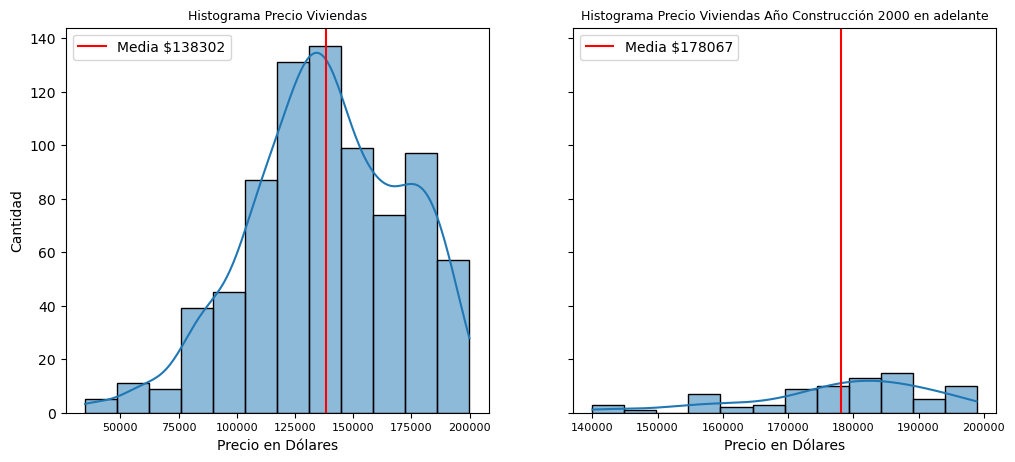

In [23]:

df_super_elegido_nuevas = df_super_elegido[df_super_elegido['YearBuilt'] >= 2000]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

media_viviendas = round(df_super_elegido['SalePrice'].mean(), 2)        # 138301.61
media_nuevas = round(df_super_elegido_nuevas['SalePrice'].mean(), 2)    # 178067.03


sns.histplot(ax=axes[0], data=df_super_elegido, x='SalePrice', bins=12, kde=True)
axes[0].set_title('Histograma Precio Viviendas', fontsize=9)
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Precio en Dólares')
axes[0].tick_params(axis='x', labelsize=8)
axes[0].axvline(media_viviendas,  color="red", linestyle="-", label=f'Media ${media_viviendas:.0f}')
axes[0].legend()

sns.histplot(ax=axes[1], data=df_super_elegido_nuevas, x='SalePrice', bins=12, kde=True)
axes[1].set_title('Histograma Precio Viviendas Año Construcción 2000 en adelante', fontsize=9)
axes[1].set_xlabel('Precio en Dólares')
axes[1].tick_params(axis='x', labelsize=8)
axes[1].axvline(media_nuevas,  color="red", linestyle="-", label=f'Media ${media_nuevas:.0f}')
axes[1].legend()

plt.show()

En consideración del tamaño muestral, usaremos un estadístico de prueba asociado a la tabla Z, pues en los gráficos podemos observar una distribución de tendencia Normal.  Además establecemos un Nivel de Significancia del 10% para determinar si la diferencia del subgrupo es significativa o no, destacando que debido a que es una prueba de una cola, tendremos que calcular el valor z solo para el lado derecho de la distribución.  Estableceremos como parámetros de referencia la media y desviación estándar de la muestra filtrada ya que es contra lo que vamos a comparar el valor medio de las casas nuevas.

<img src='estadisticoz.jpg'>

***Nivel de Significancia: 10%***

In [47]:
from scipy.stats import norm
import numpy as np

alfa = 0.10
z_prueba_1_cola_derecha = round(norm.ppf(1 - alfa), 4)                                     # 1.2816

des_std_viviendas = round(df_super_elegido['SalePrice'].std(), 0)                          # 32917
tamano_catalogo_nuevas = df_super_elegido_nuevas.shape[0]                                  # 78
media_df_super_elegido_nuevas = round(df_super_elegido_nuevas['SalePrice'].mean(), 2)      # 178067.03
des_std_df_super_elegido_nuevas = round(df_super_elegido_nuevas['SalePrice'].std(), 2)     # 13879.94

valor_z_muestra = (media_df_super_elegido_nuevas - media_viviendas) / (des_std_viviendas / np.sqrt(tamano_catalogo_nuevas))  # 10.67


In [66]:
print(' ANTECEDENTES '.center(50, '='))
print()
print('Media Poblacional Viviendas'.ljust(35, '.') + f'US ${media_viviendas}.'.rjust(15))
print('Media Viviendas Antiguas'.ljust(35, '.') + f'US ${media_nuevas}.'.rjust(15))
print('Nivel de Significancia'.ljust(45, '.') + '10%.'.rjust(5))
print('Valor Z Crítico'.ljust(42, '.') + f'{z_prueba_1_cola_derecha}.'.rjust(8))
print('Valor Z Calculado'.ljust(41, '.') + f'{valor_z_muestra:.4f}.'.rjust(9))
print('Valor p Crítico'.ljust(42, '.') + f'{alfa:.4f}.'.rjust(8))
print('Valor p Calculado'.ljust(45, '.') + f'{alfa}.'.rjust(5))


================== ANTECEDENTES ==================

Media Poblacional Viviendas........ US $138301.61.
Media Viviendas Antiguas........... US $178067.03.
Nivel de Significancia....................... 10%.
Valor Z Crítico........................... 1.2816.
Valor Z Calculado........................ 10.6692.
Valor p Crítico........................... 0.1000.
Valor p Calculado............................ 0.1.


# Conclusión

De acuerdo a los datos recabados y bajo los criterios de evaluación establecidos por nuestra investigación de una nivel de significancia del 10%, rechazamos la Hipótesis Nula ya que el valor promedio de las casas nuevas disponibles en nuestro catálogo es muy superior al valor crítico.  Esto implica que existe diferencia sustancial en precio entre las viviendas antiguas y nuevas de nuestro catálogo y por lo tanto conviene ofrecer a nuestro cliente objetivo las casas de nuestro primer grupo.

Cabe destacar que nuestro tamaño muestral es de 78 viviendas.-
